**Misura della curva di trasferimento VTC per un amplificatore invertente**

Misure di $V_{in}$ e $V_{out}$, aumentando progressivamente l'ampiezza di uscita fino alla saturazione

In [10]:
%matplotlib notebook
import pandas as pd
import numpy as np
data_vtc = pd.read_csv('data_vtc.csv', delimiter='\t')
data_vtc

,Vin+ mv,Vout- mv,Vin- mv,Vout+ mv,scala Vin mv,scala Vout mv
0,87.89,-729.2,-101.0,829,500,1000
1,425.50,-3800.0,-469.1,3967,500,5000
2,912.10,-7625.0,-931.1,7862,1000,10000
3,1178.00,-10120.0,-1230.0,10360,2000,20000
4,1373.00,-10830.0,-1406.0,11450,2000,20000
5,1558.00,-10830.0,-1610.0,11500,2000,20000
6,1857.00,-10830.0,-1905.0,11400,2000,20000


Calcolo gli errori associati alle misure 

$\sigma = \sqrt{(0.56 \; \Delta_{scala} x)^{2} + (0.56 \; \Delta_{lettura} \; digit)^{2}}$

- $\Delta_{scala}$ e' dato dal costruttore e vale $0.03$
- $\Delta_{digit}$ e' dato da $\frac{1}{2^{8}} * \; scala$, dove $8$ e' la risoluzione dell'oscilloscopio

In [2]:
vtc_cols = list(data_vtc.columns.values)
TRIANG = 0.56
SCALA = 0.03
data_vtc['errVin+'] = ( (SCALA * TRIANG * data_vtc['Vin+ mv'])**2 + (TRIANG * 2/256 * data_vtc['scala Vin mv'])**2 )**(1/2)
data_vtc['errVin-'] = ( (SCALA * TRIANG * data_vtc['Vin- mv'])**2 + (TRIANG * 2/256 * data_vtc['scala Vin mv'])**2 )**(1/2)
data_vtc['errVout+'] = ( (SCALA * TRIANG * data_vtc['Vout+ mv'])**2 + (TRIANG * 2/256 * data_vtc['scala Vout mv'])**2 )**(1/2)
data_vtc['errVout-'] = ( (SCALA * TRIANG * data_vtc['Vout- mv'])**2 + (TRIANG * 2/256 * data_vtc['scala Vout mv'])**2 )**(1/2)
data_vtc

,Vin+ mv,Vout- mv,Vin- mv,Vout+ mv,scala Vin mv,scala Vout mv,errVin+,errVin-,errVout+,errVout-
0,87.89,-729.2,-101.0,829,500,1000,2.639197,2.768445,14.598203,13.008338
1,425.50,-3800.0,-469.1,3967,500,5000,7.475612,8.178840,70.143792,67.483785
2,912.10,-7625.0,-931.1,7862,1000,10000,15.935606,16.242777,139.138821,135.364960
3,1178.00,-10120.0,-1230.0,10360,2000,20000,21.638448,22.440218,194.804919,191.211114
4,1373.00,-10830.0,-1406.0,11450,2000,20000,24.670251,25.189377,211.325861,201.890736
5,1558.00,-10830.0,-1610.0,11500,2000,20000,27.598219,28.428099,212.090759,201.890736
6,1857.00,-10830.0,-1905.0,11400,2000,20000,32.401431,33.178585,210.561536,201.890736


Prima di procedere con l'analisi dati, isolo i masssimi e i minimi, non potendo garantire la compatibilita' tra i due set a priori.

In [3]:
max_vtc = data_vtc[["Vin+ mv", "Vout+ mv", "errVin+", "errVout+"]]
min_vtc = data_vtc[["Vin- mv", "Vout- mv", "errVin-", "errVout-"]]
max_vtc
min_vtc

,Vin- mv,Vout- mv,errVin-,errVout-
0,-101.0,-729.2,2.768445,13.008338
1,-469.1,-3800.0,8.178840,67.483785
2,-931.1,-7625.0,16.242777,135.364960
3,-1230.0,-10120.0,22.440218,191.211114
4,-1406.0,-10830.0,25.189377,201.890736
5,-1610.0,-10830.0,28.428099,201.890736
6,-1905.0,-10830.0,33.178585,201.890736


Faccio un grafico esplorativo

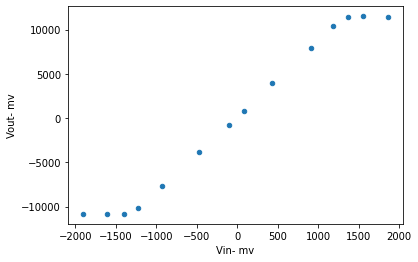

In [4]:
import matplotlib
import matplotlib.pyplot as plt
plt1 = max_vtc.plot.scatter(x="Vin+ mv", y="Vout+ mv")
min_vtc.plot.scatter(x="Vin- mv", y="Vout- mv", ax=plt1)
plt.show()

Reietto i dati affetti dalla saturazione dell'amplificatore

In [5]:
max_vtcR = max_vtc.drop(max_vtc.index[[6,5,4]])
min_vtcR = min_vtc.drop(max_vtc.index[[6,5,4]])
max_vtcR 

,Vin+ mv,Vout+ mv,errVin+,errVout+
0,87.89,829,2.639197,14.598203
1,425.50,3967,7.475612,70.143792
2,912.10,7862,15.935606,139.138821
3,1178.00,10360,21.638448,194.804919


In [6]:
min_vtcR

,Vin- mv,Vout- mv,errVin-,errVout-
0,-101.0,-729.2,2.768445,13.008338
1,-469.1,-3800.0,8.178840,67.483785
2,-931.1,-7625.0,16.242777,135.364960
3,-1230.0,-10120.0,22.440218,191.211114


Faccio un fit di entrambi i set presi singolarmente

<IPython.core.display.Javascript object>


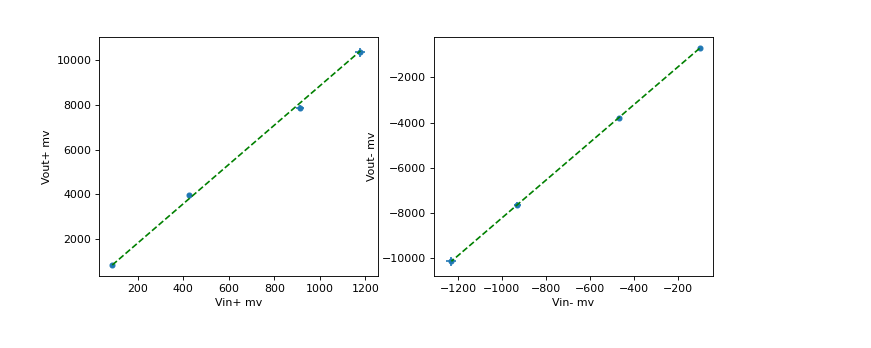

----Massimi----
 m 8.799344299593242 	 0.22355439510939884 
 q 63.50659932713847 	 48.630585969263095
----Minimi----
 m 8.320426124121065 	 0.01040878623575182 
 q 110.82434767953245 	 2.3922327268968053


In [39]:
from scipy.optimize import curve_fit
# creates subplots
fig, axes = plt.subplots(ncols=2)
fig.set_figwidth(10)
fig.set_figheight(4)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
max_vtcR.plot.scatter(x="Vin+ mv", y="Vout+ mv", xerr="errVin+",
                      yerr="errVout+", ax=axes[0])
min_vtcR.plot.scatter(x="Vin- mv", y="Vout- mv", xerr="errVin-",
                      yerr="errVout-", ax=axes[1])
def func(x, m, q):
    return m*x+q
# creates fits

# max
X = max_vtcR["Vin+ mv"]
Y = max_vtcR["Vout+ mv"]
errY = max_vtcR["errVout+"]
max_fit,max_cov = curve_fit(func, X,Y, sigma=errY)
errY = np.sqrt( errY**2 + max_fit[0]**2 * max_vtcR["errVin+"]**2 )
max_fit,max_cov = curve_fit(func, X,Y, sigma=errY)
axes[0].plot(X, func(X,*max_fit), 'g--')

# min
X = min_vtcR["Vin- mv"]
Y = min_vtcR["Vout- mv"]
errY = min_vtcR["errVout-"]
min_fit,min_cov = curve_fit(func, X,Y, sigma=errY)
errY = np.sqrt( errY**2 + min_fit[0]**2 * min_vtcR["errVin-"]**2 )
min_fit,min_cov = curve_fit(func, X,Y, sigma=errY)
axes[1].plot(X, func(X,*min_fit), 'g--')

plt.show()

# stampo risultati dei fit
max_m = max_fit[0];
max_q = max_fit[1];
max_m_err = np.sqrt(max_cov[0][0])
max_q_err = np.sqrt(max_cov[1][1])

min_m = min_fit[0];
min_q = min_fit[1];
min_m_err = np.sqrt(min_cov[0][0])
min_q_err = np.sqrt(min_cov[1][1])

print("----Massimi----\n m", max_m, "\t", max_m_err,
      "\n q", max_q, "\t", max_q_err)
print("----Minimi----\n m", min_m, "\t", min_m_err,
      "\n q", min_q, "\t", min_q_err)


Controllo la compatibilita' tra i due fit 

In [40]:
comp_mm = abs(max_m - min_m)/np.sqrt((max_m_err)**2 + (min_m_err)**2)
# compatib con lo zero delle intercette
comp_qMax0 = max_q/max_q_err
comp_qMin0 = min_q/min_q_err

# comp tra intercette
comp_qq = abs(max_q - min_q)/np.sqrt((max_q_err)**2 + (min_q_err)**2)
print("comp m1 m2\t", comp_mm,
      "\ncomp qMax 0\t", comp_qMax0,
      "\ncomp qMin 0\t", comp_qMin0,
      "\ncomp q1 q2\t", comp_qq)

comp m1 m2	 2.139970904880285 
comp qMax 0	 1.3058982955146323 
comp qMin 0	 46.32674172269742 
comp q1 q2	 0.9718287422821993


Faccio un fit unico 

<IPython.core.display.Javascript object>


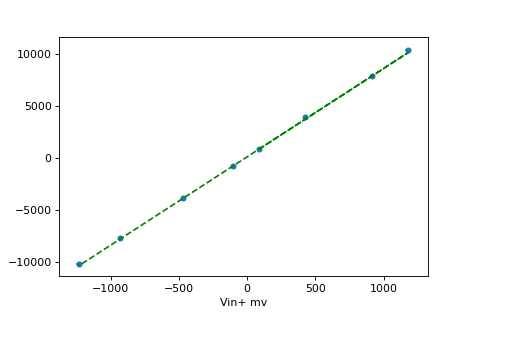

m 8.481895106352958 	 0.10725270074795902 
q 120.80112601953127 	 23.9524426870733


In [42]:
# unisco i set
min_vtcNEW = min_vtcR.rename(columns = {"Vout- mv": "Vout+ mv", "Vin- mv": "Vin+ mv",
                                        "errVin-":"errVin+", "errVout-":"errVout+"})
ytot = max_vtcR.append(min_vtcNEW, ignore_index=True)
ax1 = ytot.plot.scatter(x='Vin+ mv', y='Vout+ mv', xerr='errVin+', yerr='errVout+')

# fit & plot
X = ytot["Vin+ mv"]
Y = ytot["Vout+ mv"]
errY = ytot["errVout+"]

tot_fit,tot_cov = curve_fit(func, X,Y, sigma=errY)
errY = np.sqrt( errY**2 + tot_fit[0]**2 * ytot["errVin+"]**2 )
tot_fit,tot_cov = curve_fit(func, X,Y, sigma=errY)
ax1.plot(X, func(X,*tot_fit), 'g--')

plt.show()

# stampo i risultati 
tot_m = tot_fit[0];
tot_q = tot_fit[1];
tot_m_err = np.sqrt(tot_cov[0][0])
tot_q_err = np.sqrt(tot_cov[1][1])

print("m", tot_m, "\t", tot_m_err,
      "\nq", tot_q, "\t", tot_q_err)

Confronto l'amplificazione attesa con quella teorica

$A_{th} = \frac{R_f}{R_1}$

In [43]:
# costanti multimetro
errScala = 0.008
errDigit = 2
TRIANG = 0.56
# misure dirette + errori 
Rf = 67.9e3
sigmaRf = np.sqrt( (Rf*errScala*TRIANG)**2 + 
                  (errDigit*0.1*0.56)**2 )
R1 = 8.10e3
sigmaR1 = np.sqrt( (R1*errScala*TRIANG)**2 + 
                  (errDigit*0.01*0.56)**2 )
Rg = 600
Ath = Rf/R1
sigmaAth = np.sqrt( (sigmaRf/R1)**2 + (Rf/(R1)**2*sigmaR1)**2 )
Asp = tot_m
sigmaAsp = tot_m_err
compA = abs(Ath-Asp)/np.sqrt( (sigmaAth**2 + sigmaAsp)**2 )
print("A teorico:\t" , Ath, "\t", sigmaAth,
     "\nA sperime:\t", Asp, "\t", sigmaAsp,
     "\ncompatib: \t ", compA)


A teorico:	 8.382716049382717 	 0.05311018231974522 
A sperime:	 8.481895106352958 	 0.10725270074795902 
compatib: 	  0.9010266239222062


Provo ora a vedere se si riesce a risolvere l'incompatibilita' delle intercette max/min unendo i set, ma plottando i valori picco/picco

<IPython.core.display.Javascript object>


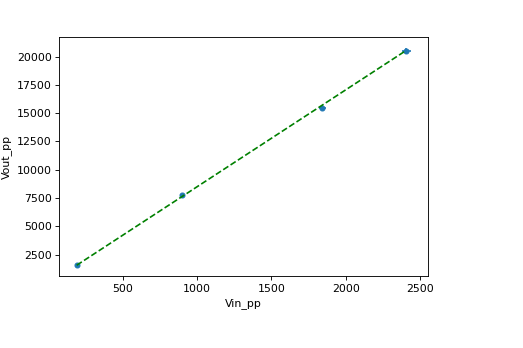

m 8.556309816706651 	 0.11174294550575442 
q -50.397446963893834 	 50.00511640538192


In [49]:
vtc_pp = pd.DataFrame()
vtc_pp['Vout_pp'] = max_vtcR['Vout+ mv'] - min_vtcR['Vout- mv']
vtc_pp['Vin_pp'] = max_vtcR['Vin+ mv'] - min_vtcR['Vin- mv']
vtc_pp['Err_Vout_pp'] = np.sqrt( max_vtcR['errVout+']**2 + min_vtcR['errVout-']**2)
vtc_pp['Err_Vin_pp'] = np.sqrt( max_vtcR['errVin+']**2 + min_vtcR['errVin-']**2)

X = vtc_pp["Vin_pp"]
Y = vtc_pp["Vout_pp"]
errY = vtc_pp["Err_Vout_pp"]

ax2 = vtc_pp.plot.scatter(x = 'Vin_pp', y = 'Vout_pp', xerr = "Err_Vin_pp",
                          yerr = 'Err_Vout_pp')

pp_fit,pp_cov = curve_fit(func, X,Y, sigma=errY)
errY = np.sqrt( errY**2 + pp_fit[0]**2 * vtc_pp["Err_Vin_pp"]**2 )
pp_fit,pp_cov = curve_fit(func, X,Y, sigma=errY)
ax2.plot(X, func(X,*pp_fit), 'g--')
plt.show()

# stampo i risultati 
pp_m = pp_fit[0];
pp_q = pp_fit[1];
pp_m_err = np.sqrt(pp_cov[0][0])
pp_q_err = np.sqrt(pp_cov[1][1])

print("m", pp_m, "\t", pp_m_err,
      "\nq", pp_q, "\t", pp_q_err)

In [50]:
Asp = pp_m
sigmaAsp = pp_m_err
compA = abs(Ath-Asp)/np.sqrt( (sigmaAth**2 + sigmaAsp)**2 )
print("A teorico:\t" , Ath, "\t", sigmaAth,
     "\nA sperime:\t", Asp, "\t", sigmaAsp,
     "\ncompatib: \t ", compA)


A teorico:	 8.382716049382717 	 0.05311018231974522 
A sperime:	 8.556309816706651 	 0.11174294550575442 
compatib: 	  1.515260617700872
